# ARCHS4 module-trait association analysis

In [113]:
library(here)
library(dplyr)
library(Rtsne)
library(ggplot2)

set.seed(123)

In [114]:
gtex_plier2 <- readRDS(here('output/gtex/gtex_PLIER2.rds'))

In [115]:
gtex_B  <- data.frame(as.matrix(gtex_plier2$B))

In [116]:
head(gtex_B)

X1          X2          X3          X4          X5          X6         
LV1  0.03257970  0.31688944 -0.01652463 -0.01582753  0.12393464  0.01843161
LV2  0.12070551  0.05764353  0.16713222  0.13380051  0.22431217  0.23759121
LV3  0.19948646 -0.12985110  0.25405005  0.13267795  0.08561751  0.06266862
LV4 -0.04024274  0.20201832  0.06699534 -0.09324692 -0.04423006 -0.04766771
LV5  0.19200975 -0.31208927  0.00663365  0.08917150 -0.27401818 -0.01745856
LV6 -0.14884764  0.22970086  0.03445998 -0.15979744  0.17370897 -0.13740194
    X7           X8          X9          X10         ⋯ X17373      X17374     
LV1 -0.045959853 -0.06111202  0.05278520 -0.03151970 ⋯ -0.01788312 -0.12116795
LV2  0.159340214  0.10109841  0.24959822  0.03195890 ⋯  0.17406552 -0.08849861
LV3  0.144205232  0.21012988  0.20783023  0.12398684 ⋯  0.11496285 -0.05291973
LV4 -0.109638445  0.77048805 -0.09731888  0.04972073 ⋯ -0.08255960 -0.07583099
LV5  0.004012015  0.04884959  0.11555692  0.22739538 ⋯ -0.21299678  0.15831947
LV6 -0.134797558 -0.08483995 -0.15800498 -0.17545279 ⋯  0.03708362 -0.11053754
    X17375      X17376       X17377       X17378      X17379     X17380     
LV1  0.01347809 -0.004354779 -0.036074283 -0.05998220 -0.1138489  0.03506155
LV2  0.05826709  0.044544757  0.006747997 -0.22876341  0.1400076  0.11328481
LV3  0.32739908  0.205773922  0.304102669  0.14566030  0.2737468  0.23183374
LV4 -0.09007563 -0.070900121 -0.007319276 -0.03591702  0.8528391 -0.04984966
LV5 -0.03887408 -0.030798477 -0.044410463 -0.20749206  0.2177901  0.10074301
LV6  0.01568047 -0.099108641 -0.186046212 -0.14780288 -0.1364992 -0.30496579
    X17381       X17382     
LV1  0.327478237 -0.03853423
LV2  0.024029537  0.11554922
LV3 -0.218533047  0.08348651
LV4  0.005184242 -0.07377695
LV5 -0.428941607  0.11196711
LV6 -0.153077836 -0.17507791

In [117]:
metadata  <- readRDS(here('output/gtex/FBMgtex_meta.RDS'))

In [118]:
head(metadata$colNames)

[1] "GTEX-1117F-0226-SM-5GZZ7" "GTEX-1117F-0426-SM-5EGHI"
[3] "GTEX-1117F-0526-SM-5EGHJ" "GTEX-1117F-0626-SM-5N9CS"
[5] "GTEX-1117F-0726-SM-5GIEN" "GTEX-1117F-1326-SM-5EGHH"

In [119]:
colnames(gtex_B) <- metadata$colNames

In [120]:
head(gtex_B)

GTEX-1117F-0226-SM-5GZZ7 GTEX-1117F-0426-SM-5EGHI GTEX-1117F-0526-SM-5EGHJ
LV1  0.03257970               0.31688944              -0.01652463             
LV2  0.12070551               0.05764353               0.16713222             
LV3  0.19948646              -0.12985110               0.25405005             
LV4 -0.04024274               0.20201832               0.06699534             
LV5  0.19200975              -0.31208927               0.00663365             
LV6 -0.14884764               0.22970086               0.03445998             
    GTEX-1117F-0626-SM-5N9CS GTEX-1117F-0726-SM-5GIEN GTEX-1117F-1326-SM-5EGHH
LV1 -0.01582753               0.12393464               0.01843161             
LV2  0.13380051               0.22431217               0.23759121             
LV3  0.13267795               0.08561751               0.06266862             
LV4 -0.09324692              -0.04423006              -0.04766771             
LV5  0.08917150              -0.27401818              -0.01745856             
LV6 -0.15979744               0.17370897              -0.13740194             
    GTEX-1117F-2426-SM-5EGGH GTEX-1117F-2526-SM-5GZY6 GTEX-1117F-2826-SM-5GZXL
LV1 -0.045959853             -0.06111202               0.05278520             
LV2  0.159340214              0.10109841               0.24959822             
LV3  0.144205232              0.21012988               0.20783023             
LV4 -0.109638445              0.77048805              -0.09731888             
LV5  0.004012015              0.04884959               0.11555692             
LV6 -0.134797558             -0.08483995              -0.15800498             
    GTEX-1117F-2926-SM-5GZYI ⋯ GTEX-ZZPU-1126-SM-5N9CW GTEX-ZZPU-1226-SM-5N9CK
LV1 -0.03151970              ⋯ -0.01788312             -0.12116795            
LV2  0.03195890              ⋯  0.17406552             -0.08849861            
LV3  0.12398684              ⋯  0.11496285             -0.05291973            
LV4  0.04972073              ⋯ -0.08255960             -0.07583099            
LV5  0.22739538              ⋯ -0.21299678              0.15831947            
LV6 -0.17545279              ⋯  0.03708362             -0.11053754            
    GTEX-ZZPU-1326-SM-5GZWS GTEX-ZZPU-1426-SM-5GZZ6 GTEX-ZZPU-1826-SM-5E43L
LV1  0.01347809             -0.004354779            -0.036074283           
LV2  0.05826709              0.044544757             0.006747997           
LV3  0.32739908              0.205773922             0.304102669           
LV4 -0.09007563             -0.070900121            -0.007319276           
LV5 -0.03887408             -0.030798477            -0.044410463           
LV6  0.01568047             -0.099108641            -0.186046212           
    GTEX-ZZPU-2126-SM-5EGIU GTEX-ZZPU-2226-SM-5EGIV GTEX-ZZPU-2426-SM-5E44I
LV1 -0.05998220             -0.1138489               0.03506155            
LV2 -0.22876341              0.1400076               0.11328481            
LV3  0.14566030              0.2737468               0.23183374            
LV4 -0.03591702              0.8528391              -0.04984966            
LV5 -0.20749206              0.2177901               0.10074301            
LV6 -0.14780288             -0.1364992              -0.30496579            
    GTEX-ZZPU-2626-SM-5E45Y GTEX-ZZPU-2726-SM-5NQ8O
LV1  0.327478237            -0.03853423            
LV2  0.024029537             0.11554922            
LV3 -0.218533047             0.08348651            
LV4  0.005184242            -0.07377695            
LV5 -0.428941607             0.11196711            
LV6 -0.153077836            -0.17507791

In [121]:
gtex_summary_sig  <- gtex_plier2$summary %>% 
dplyr::filter(FDR < 0.05)  %>% 
dplyr::filter(AUC > 0.7)  %>% 
dplyr::select(pathway, `LV index`)  %>% 
dplyr::rename(LV = `LV index`)  %>% 
dplyr::mutate(LV = paste0('LV', LV))

head(gtex_summary_sig)

pathway                                           LV 
1 CD1C-CD141- Dendritic Cell Blood Human            LV2
2 Microglial Cell Brain Mouse                       LV2
3 Microglial Cell Embryonic Prefrontal Cortex Human LV2
4 Monocyte Fetal Kidney Human                       LV2
5 Paneth Cell Large Intestine Human                 LV2
6 Podocyte Kidney Mouse                             LV3

In [122]:
gtex_meta <- read.table(
    here('data/gtex/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt'), 
    sep = '\t', 
    header = TRUE,
    quote = "", 
    fill = TRUE,
    comment.char = "" 
)

In [123]:
head(gtex_meta)

SAMPID                        SMATSSCR SMCENTER
1 GTEX-1117F-0003-SM-58Q7G      NA       B1      
2 GTEX-1117F-0003-SM-5DWSB      NA       B1      
3 GTEX-1117F-0003-SM-6WBT7      NA       B1      
4 GTEX-1117F-0011-R10a-SM-AHZ7F NA       B1, A1  
5 GTEX-1117F-0011-R10b-SM-CYKQ8 NA       B1, A1  
6 GTEX-1117F-0226-SM-5GZZ7       0       B1      
  SMPTHNTS                                     SMRIN SMTS          
1                                               NA   Blood         
2                                               NA   Blood         
3                                               NA   Blood         
4                                               NA   Brain         
5                                              7.2   Brain         
6 2 pieces, ~15% vessel stroma, rep delineated 6.8   Adipose Tissue
  SMTSD                        SMUBRID SMTSISCH SMTSPAX ⋯ SME1ANTI SMSPLTRD
1 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
2 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
3 Whole Blood                  0013756 1188       NA    ⋯       NA       NA
4 Brain - Frontal Cortex (BA9) 0009834 1193       NA    ⋯       NA       NA
5 Brain - Frontal Cortex (BA9) 0009834 1193       NA    ⋯       NA       NA
6 Adipose - Subcutaneous       0002190 1214     1125    ⋯ 14648800 11999300
  SMBSMMRT   SME1SNSE SME1PCTS SMRRNART   SME1MPRT SMNUM5CD SMDPMPRT SME2PCTS
1         NA       NA      NA          NA      NA  NA       NA            NA 
2         NA       NA      NA          NA      NA  NA       NA            NA 
3         NA       NA      NA          NA      NA  NA       NA            NA 
4         NA       NA      NA          NA      NA  NA       NA            NA 
5         NA       NA      NA          NA      NA  NA       NA            NA 
6 0.00315785 14669500 50.0354  0.00310538 0.99474  NA        0       50.1944

In [124]:
table(colnames(gtex_B) %in% gtex_meta$SAMPID)


 TRUE 
17382 

In [125]:
tissues_to_keep <- names(table(gtex_meta$SMTS)[table(gtex_meta$SMTS) >= 200])

gtex_meta_filtered <- gtex_meta %>% dplyr::filter(SMTS %in% tissues_to_keep)

table(gtex_meta_filtered$SMTS)


Adipose Tissue  Adrenal Gland          Blood   Blood Vessel    Bone Marrow 
          1327            275           3480           1473            217 
         Brain         Breast          Colon      Esophagus          Heart 
          3326            480            821           1582           1141 
         Liver           Lung         Muscle          Nerve       Pancreas 
           251            867           1132            722            360 
     Pituitary       Prostate           Skin         Spleen        Stomach 
           301            262           2014            260            381 
        Testis        Thyroid 
           406            812 

In [126]:
gtex_B <- gtex_B %>%
    dplyr::select(any_of(gtex_meta_filtered$SAMPID))

In [127]:
# gtex_B <- gtex_B[rownames(gtex_B) %in% gtex_summary_sig$LV, ]


In [128]:

# Use gtex_B data instead of archs4_b_sub
mat_jitter <- jitter(t(gtex_B), factor = 1e-6)
tsne_res <- Rtsne(mat_jitter, perplexity = 30, max_iter = 1000, verbose = TRUE, check_duplicates = FALSE)
tsne_df <- data.frame(
  sample_id = rownames(mat_jitter),
  tSNE_1    = tsne_res$Y[,1],
  tSNE_2    = tsne_res$Y[,2]
) %>%
  left_join(
    gtex_meta_filtered %>% select(SAMPID, SMTS) %>% rename(sample_id = SAMPID, tissue = SMTS),
    by = "sample_id"
  )
tsne_centroids <- tsne_df %>%
  group_by(tissue) %>%
  summarise(tSNE_1 = mean(tSNE_1), tSNE_2 = mean(tSNE_2))

Performing PCA
Read the 16417 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 10000 of 16417
Done in 4.89 seconds (sparsity = 0.007544)!
Learning embedding...
Iteration 50: error is 103.074127 (50 iterations in 2.03 seconds)
Iteration 100: error is 88.956855 (50 iterations in 2.37 seconds)
Iteration 150: error is 77.533397 (50 iterations in 2.25 seconds)
Iteration 200: error is 74.021723 (50 iterations in 2.28 seconds)
Iteration 250: error is 72.310386 (50 iterations in 2.34 seconds)
Iteration 300: error is 2.919673 (50 iterations in 2.17 seconds)
Iteration 350: error is 2.599673 (50 iterations in 2.02 seconds)
Iteration 400: error is 2.370162 (50 iterations in 1.98 seconds)
Iteration 450: error is 2.201870 (50 iterations in 1.93 seconds)
Iteration 500: error is 2.074389 (50 iterations in 1.97 seconds)
Iteration 550: error is 1.974002 (50 iterations in 

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'tSNE₂' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'tSNE₂' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'tSNE₂' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'tSNE₂' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'tSNE₂' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'tSNE₂' in 'mbcsToSbcs': dot substituted for <82>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$la

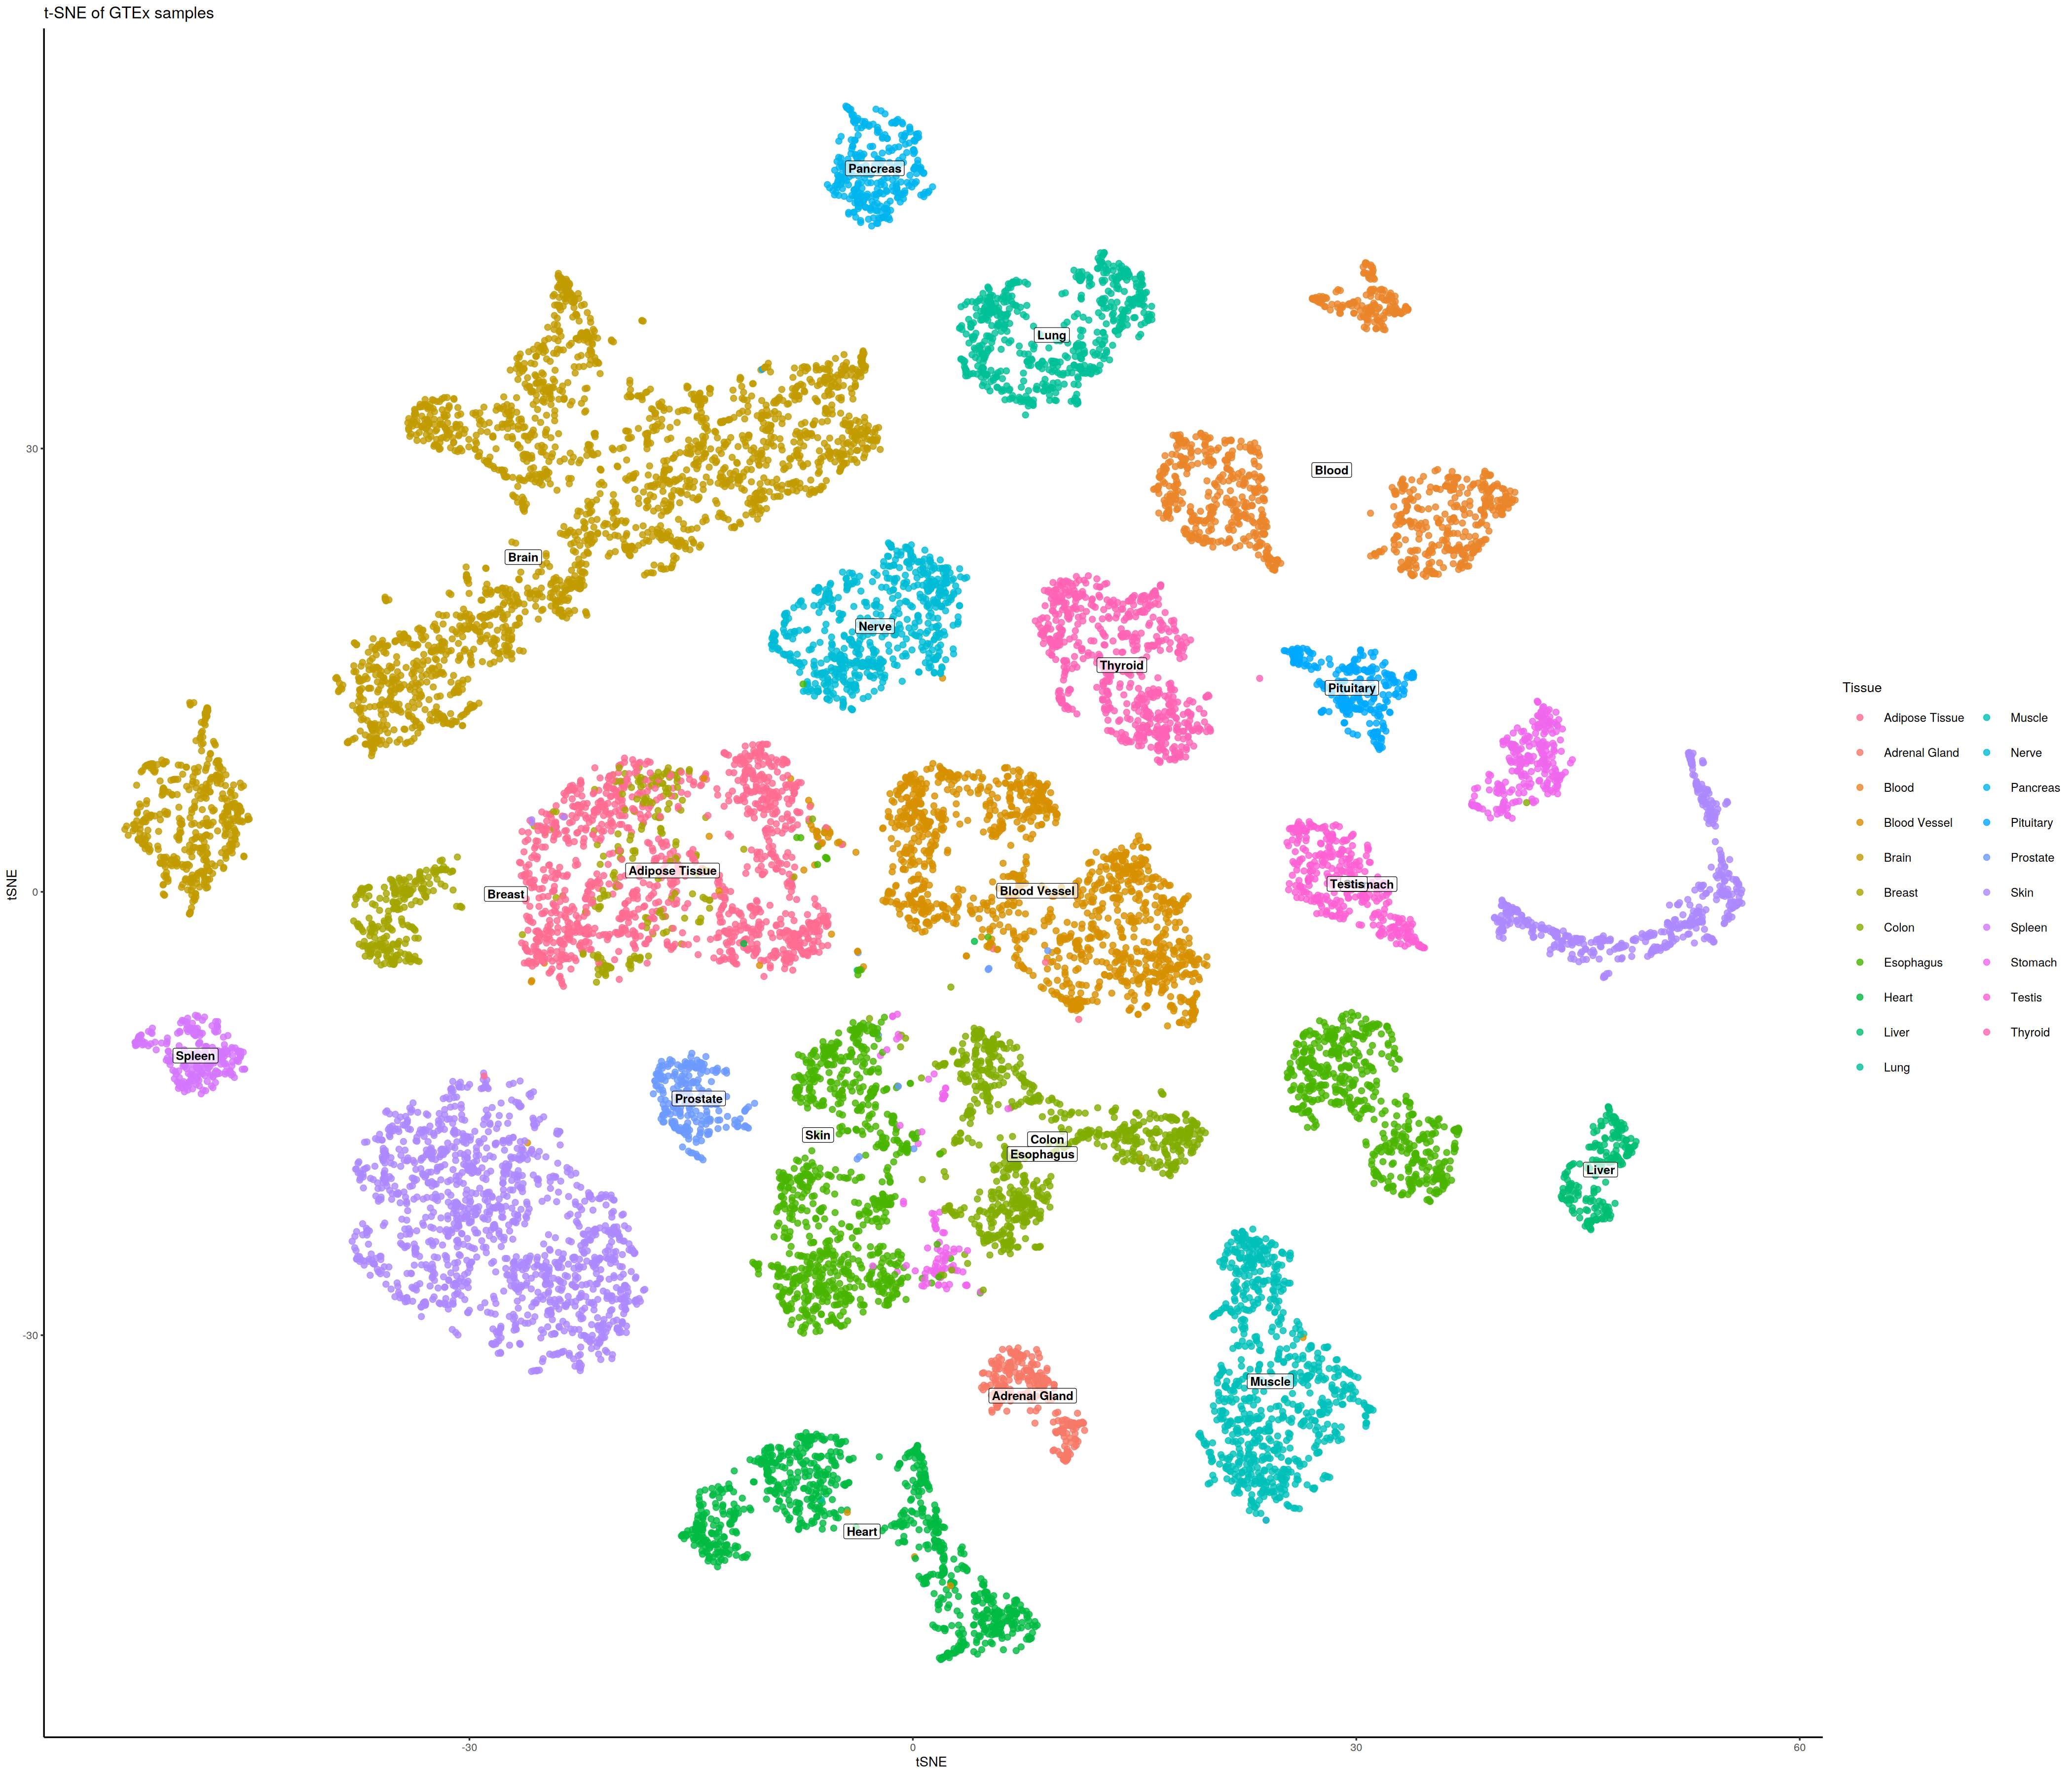

In [129]:
options(repr.plot.width = 35, repr.plot.height = 30)

n_tissues <- n_distinct(tsne_df$tissue)

palette_hue <- hue_pal(h = c(0, 360), c = 100, l = 65)(n_tissues)

ggplot(tsne_df, aes(tSNE_1, tSNE_2, colour = tissue)) +
  geom_point(size = 3, alpha = 0.8) +
  geom_label(
    data = tsne_centroids,
    aes(label = tissue),
    size = 5, fontface = "bold",
    colour = "black", fill = "white", alpha = 0.7
  ) +
  scale_color_manual(values = palette_hue) +
  labs(
    title = "t-SNE of GTEx samples",
    x = "tSNE₁", y = "tSNE₂", colour = "Tissue"
  ) +
  theme_classic(base_size = 16) +
  theme(
    legend.key.size = unit(1.5, "cm"),
    legend.text       = element_text(size = 14),
    legend.title      = element_text(size = 16)
  )


In [130]:
gtex_traits  <- readRDS(here('data/gtex/gtex-phenoplier.rds'))

In [131]:
head(gtex_traits)

phenotype phenotype_desc                                                
0 6142_1    Current employment status: In paid employment or self-employed
1 6142_1    Current employment status: In paid employment or self-employed
2 6142_1    Current employment status: In paid employment or self-employed
3 6142_1    Current employment status: In paid employment or self-employed
4 6142_1    Current employment status: In paid employment or self-employed
5 6142_1    Current employment status: In paid employment or self-employed
  lv     pvalue       fdr       
0 LV1821 5.168893e-05 0.04937946
1 LV691  1.360117e-04 0.09465254
2 LV16   2.540924e-04 0.13932497
3 LV784  8.001756e-04 0.25725461
4 LV741  1.188780e-03 0.30805831
5 LV1052 1.715945e-03 0.36034046

In [132]:
library(dplyr)

# 1. align metadata
meta <- gtex_meta %>%
  select(SAMPID, SMTS) %>%
  mutate(SAMPID = trimws(SAMPID)) %>% 
  slice(match(colnames(gtex_B), SAMPID))

# 2. for each tissue compute t‐stat for each LV
tissues <- unique(meta$SMTS)
best_LV_by_tissue <- sapply(tissues, function(tiss) {
  group <- meta$SMTS == tiss
  # compute |t| for each LV
  t_stats <- apply(gtex_B, 1, function(vals) {
    x1 <- vals[group]; x2 <- vals[!group]
    m1 <- mean(x1); m2 <- mean(x2)
    v1 <- var(x1);  v2 <- var(x2)
    n1 <- length(x1); n2 <- length(x2)
    numerator   <- m1 - m2
    denominator <- sqrt(v1/n1 + v2/n2)
    abs(numerator / denominator)
  })
  # return the LV with max |t|
  names(which.max(t_stats))
})

# 3. show results
best_LV_by_tissue  <- data.frame(best_LV_by_tissue)
colnames(best_LV_by_tissue) <- 'LV'
best_LV_by_tissue <-  best_LV_by_tissue  %>% 
tibble::rownames_to_column('tissue')

In [145]:
best_LV_by_tissue

tissue         LV    
1  Adipose Tissue LV278 
2  Muscle         LV160 
3  Blood Vessel   LV1257
4  Heart          LV19  
5  Breast         LV1752
6  Skin           LV664 
7  Brain          LV239 
8  Adrenal Gland  LV28  
9  Thyroid        LV409 
10 Lung           LV3   
11 Spleen         LV22  
12 Pancreas       LV1777
13 Esophagus      LV730 
14 Stomach        LV582 
15 Colon          LV1023
16 Prostate       LV57  
17 Testis         LV1213
18 Nerve          LV220 
19 Blood          LV3   
20 Pituitary      LV336 
21 Liver          LV272

In [167]:
library(tidyr)

meta <- gtex_meta %>% select(SAMPID, SMTS) %>% mutate(SAMPID = trimws(SAMPID)) %>% slice(match(colnames(gtex_B), SAMPID))
tissues <- unique(meta$SMTS)
top5_LVs_by_tissue <- lapply(tissues, function(tiss) {
    group <- meta$SMTS == tiss
    t_stats <- apply(gtex_B, 1, function(vals) (mean(vals[group]) - mean(vals[!group])) / sqrt(var(vals[group]) / sum(group) + var(vals[!group]) / sum(!group)))
    names(sort(abs(t_stats), decreasing = TRUE))[1:5]
})
best5_df <- tibble(tissue = tissues, LV_list = top5_LVs_by_tissue) %>% unnest_longer(LV_list) %>% rename(LV = LV_list)
best5_df

tissue         LV    
1   Adipose Tissue LV278 
2   Adipose Tissue LV156 
3   Adipose Tissue LV1777
4   Adipose Tissue LV31  
5   Adipose Tissue LV1557
6   Muscle         LV160 
7   Muscle         LV1682
8   Muscle         LV382 
9   Muscle         LV215 
10  Muscle         LV1267
11  Blood Vessel   LV1257
12  Blood Vessel   LV220 
13  Blood Vessel   LV168 
14  Blood Vessel   LV1557
15  Blood Vessel   LV226 
16  Heart          LV19  
17  Heart          LV1017
18  Heart          LV915 
19  Heart          LV1021
20  Heart          LV348 
21  Breast         LV1752
22  Breast         LV239 
23  Breast         LV1747
24  Breast         LV1641
25  Breast         LV50  
26  Skin           LV664 
27  Skin           LV346 
28  Skin           LV1872
29  Skin           LV1558
30  Skin           LV958 
⋮   ⋮              ⋮     
76  Prostate       LV57  
77  Prostate       LV1580
78  Prostate       LV17  
79  Prostate       LV484 
80  Prostate       LV3   
81  Testis         LV1213
82  Testis         LV1155
83  Testis         LV634 
84  Testis         LV1315
85  Testis         LV140 
86  Nerve          LV220 
87  Nerve          LV308 
88  Nerve          LV125 
89  Nerve          LV140 
90  Nerve          LV582 
91  Blood          LV3   
92  Blood          LV1099
93  Blood          LV43  
94  Blood          LV22  
95  Blood          LV23  
96  Pituitary      LV336 
97  Pituitary      LV1752
98  Pituitary      LV1267
99  Pituitary      LV456 
100 Pituitary      LV1777
101 Liver          LV272 
102 Liver          LV84  
103 Liver          LV50  
104 Liver          LV1230
105 Liver          LV378

In [169]:
gtex_traits_sig <- gtex_traits  %>% 
dplyr::rename(LV = lv) %>%
dplyr::rename(FDR = fdr)  %>% 
dplyr::filter(FDR < 0.1) %>%
dplyr::select(LV, phenotype_desc)  %>% 
dplyr::rename(phenotype = phenotype_desc)  %>% 
dplyr::group_by(LV) %>%
dplyr::summarise(phenotype = paste(phenotype, collapse = '; '))

In [170]:
gtex_summary_sig_col  <- gtex_summary_sig  %>% 
group_by(LV) %>%
summarise(pathway = paste(pathway, collapse = '; '))

In [171]:
dplyr::inner_join(best5_df, gtex_traits_sig) %>%
    dplyr::inner_join(unique(gtex_summary_sig_col))

Joining with `by = join_by(LV)`
Joining with `by = join_by(LV)`


tissue         LV    
1  Adipose Tissue LV1557
2  Blood Vessel   LV1557
3  Blood Vessel   LV226 
4  Heart          LV19  
5  Breast         LV239 
6  Breast         LV1641
7  Skin           LV1872
8  Brain          LV239 
9  Brain          LV43  
10 Thyroid        LV1219
11 Lung           LV3   
12 Lung           LV125 
13 Lung           LV72  
14 Lung           LV239 
15 Spleen         LV238 
16 Pancreas       LV25  
17 Esophagus      LV3   
18 Stomach        LV45  
19 Colon          LV779 
20 Prostate       LV3   
21 Testis         LV140 
22 Nerve          LV125 
23 Nerve          LV140 
24 Blood          LV3   
25 Blood          LV43  
26 Liver          LV272 
27 Liver          LV84  
   phenotype                                                                                                                                                                                                                                                                                                                                                                           
1  Corneal resistance factor (left); Years of cough on most days; Impedance of leg (right)                                                                                                                                                                                                                                                                                             
2  Corneal resistance factor (left); Years of cough on most days; Impedance of leg (right)                                                                                                                                                                                                                                                                                             
3  Job SOC coding: Elementary sales occupations n.e.c.; Job code - deduced: Primary and nursery education teaching professionals; Treatment/medication code: arcoxia 60mg tablet (20003_1141180148); Diagnoses - main ICD10: R14 Flatulence and related conditions; Final attempt correct: no; Final attempt correct: yes; Job SOC coding: Chartered surveyors (not quantity surveyors)
4  Spherical power (left); ECG, heart rate; Pulse rate, automated reading; Treatment/medication code: dosulepin (20003_1140909806); Pulse rate                                                                                                                                                                                                                                         
5  Illnesses of father: Alzheimer's disease/dementia; Smoking status: Previous; Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication; Water intake; Illnesses of mother: Alzheimer's disease/dementia; Smoking status: Never; Illnesses of siblings: Alzheimer's disease/dementia; Any dementia                           
6  Diagnoses - main ICD10: C61 Malignant neoplasm of prostate; Non-cancer illness code, self-reported: eczema/dermatitis; Non-cancer illness code, self-reported: ankylosing spondylitis                                                                                                                                                                                               
7  Job SOC coding: Business and related associate professionals n.e.c.; Treatment/medication code: neoclarityn 5mg tablet (20003_1141172928)                                                                                                                                                                                                                                           
8  Illnesses of father: Alzheimer's disease/dementia; Smoking status: Previous; Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones: Cholesterol lowering medication; Water intake; Illnesses of mother: Alzheimer's disease/dementia; Smoking status: Never; Illnesses of

# GTEx

In [136]:
gtex_meta <- a4.meta.meta(
  file        = h5file,
  search_term = "GTEx",
  meta_fields = c("geo_accession", "series_id", "source_name_ch1", "characteristics_ch1"),
  remove_sc   = TRUE
) 

ERROR: Error in a4.meta.meta(file = h5file, search_term = "GTEx", meta_fields = c("geo_accession", : could not find function "a4.meta.meta"


In [ ]:
library(recount3)

human_projects <- available_projects(organism = "human")
gtex_projects  <- subset(human_projects, project_home == "data_sources/gtex")

2025-06-24 08:27:44.000728 caching file sra.recount_project.MD.gz.

2025-06-24 08:27:45.043527 caching file gtex.recount_project.MD.gz.

2025-06-24 08:27:45.817836 caching file tcga.recount_project.MD.gz.



In [ ]:
head(gtex_projects)

project        organism file_source project_home      project_type
8678 ADIPOSE_TISSUE human    gtex        data_sources/gtex data_sources
8679 MUSCLE         human    gtex        data_sources/gtex data_sources
8680 BLOOD_VESSEL   human    gtex        data_sources/gtex data_sources
8681 HEART          human    gtex        data_sources/gtex data_sources
8682 OVARY          human    gtex        data_sources/gtex data_sources
8683 UTERUS         human    gtex        data_sources/gtex data_sources
     n_samples
8678 1293     
8679  881     
8680 1398     
8681  942     
8682  195     
8683  159

In [ ]:
# load libraries
library(recount3)
library(dplyr)
library(purrr)
library(ggplot2)
library(tibble)

# 1. Grab GTEx project info
human_projects <- available_projects(organism = "human")
gtex_projects  <- subset(human_projects, project_home == "data_sources/gtex")

proj_info <- subset(gtex_projects, project == "LIVER")
rse_liver <- create_rse(proj_info, type = "gene")
samples <- colData(rse_liver)$external_sample_id
head(samples)

2025-06-24 08:27:48.718616 caching file sra.recount_project.MD.gz.

2025-06-24 08:27:49.509547 caching file gtex.recount_project.MD.gz.

2025-06-24 08:27:50.217161 caching file tcga.recount_project.MD.gz.

2025-06-24 08:27:52.458527 downloading and reading the metadata.

2025-06-24 08:27:52.926116 caching file gtex.gtex.LIVER.MD.gz.

2025-06-24 08:27:53.948693 caching file gtex.recount_project.LIVER.MD.gz.

2025-06-24 08:27:54.755269 caching file gtex.recount_qc.LIVER.MD.gz.

2025-06-24 08:27:55.666594 caching file gtex.recount_seq_qc.LIVER.MD.gz.

2025-06-24 08:27:56.594033 downloading and reading the feature information.

2025-06-24 08:27:57.031195 caching file human.gene_sums.G026.gtf.gz.

2025-06-24 08:27:57.699894 downloading and reading the counts: 251 samples across 63856 features.

2025-06-24 08:27:58.187078 caching file gtex.gene_sums.LIVER.G026.gz.

2025-06-24 08:27:59.039262 constructing the RangedSummarizedExperiment (rse) object.



NULL

In [ ]:
tail(colnames(archs4_b_sub))

[1] "GSM999586" "GSM999587" "GSM999588" "GSM999589" "GSM999590" "GSM999591"

In [ ]:
colnames(archs4_b_sub)[colnames(archs4_b_sub) %in% 'GSM2343447']

[1] "GSM2343447"

In [ ]:
colnames(colData(rse_liver))

[1] "rail_id"                                                           
  [2] "external_id"                                                       
  [3] "study"                                                             
  [4] "gtex.run_acc"                                                      
  [5] "gtex.subjid"                                                       
  [6] "gtex.sex"                                                          
  [7] "gtex.age"                                                          
  [8] "gtex.dthhrdy"                                                      
  [9] "gtex.sampid"                                                       
 [10] "gtex.smatsscr"                                                     
 [11] "gtex.smcenter"                                                     
 [12] "gtex.smpthnts"                                                     
 [13] "gtex.smrin"                                                        
 [14] "gtex.smts"                                                         
 [15] "gtex.smtsd"                                                        
 [16] "gtex.smubrid"                                                      
 [17] "gtex.smtsisch"                                                     
 [18] "gtex.smtspax"                                                      
 [19] "gtex.smnabtch"                                                     
 [20] "gtex.smnabtcht"                                                    
 [21] "gtex.smnabtchd"                                                    
 [22] "gtex.smgebtch"                                                     
 [23] "gtex.smgebtchd"                                                    
 [24] "gtex.smgebtcht"                                                    
 [25] "gtex.smafrze"                                                      
 [26] "gtex.smgtc"                                                        
 [27] "gtex.sme2mprt"                                                     
 [28] "gtex.smchmprs"                                                     
 [29] "gtex.smntrart"                                                     
 [30] "gtex.smnumgps"                                                     
 [31] "gtex.smmaprt"                                                      
 [32] "gtex.smexncrt"                                                     
 [33] "gtex.sm550nrm"                                                     
 [34] "gtex.smgnsdtc"                                                     
 [35] "gtex.smunmprt"                                                     
 [36] "gtex.sm350nrm"                                                     
 [37] "gtex.smrdlgth"                                                     
 [38] "gtex.smmncpb"                                                      
 [39] "gtex.sme1mmrt"                                                     
 [40] "gtex.smsflgth"                                                     
 [41] "gtex.smestlbs"                                                     
 [42] "gtex.smmppd"                                                       
 [43] "gtex.smnterrt"                                                     
 [44] "gtex.smrrnanm"                                                     
 [45] "gtex.smrdttl"                                                      
 [46] "gtex.smvqcfl"                                                      
 [47] "gtex.smmncv"                                                       
 [48] "gtex.smtrscpt"                                                     
 [49] "gtex.smmppdpr"                                                     
 [50] "gtex.smcglgth"                                                     
 [51] "gtex.smgappct"                                                     
 [52] "gtex.smunpdrd"                                                     
 [53] "gtex.smntrnrt"                                                     
 [54] "gtex.smmpunrt"      

In [ ]:
head(rse_liver$external_id)

[1] "GTEX-14PJO-1726-SM-68719.1" "GTEX-17HII-1026-SM-7IGLY.1"
[3] "GTEX-18A7A-1526-SM-72D69.1" "GTEX-1GF9V-1226-SM-7MKGY.1"
[5] "GTEX-1GN1U-0926-SM-9WPPY.1" "GTEX-1GZ4I-1526-SM-9OSW9.1"

In [ ]:
head(rse_liver$gtex.subjid)

[1] "GTEX-14PJO" "GTEX-17HII" "GTEX-18A7A" "GTEX-1GF9V" "GTEX-1GN1U"
[6] "GTEX-1GZ4I"

In [ ]:
colData(rse_liver)  %>% head()

DataFrame with 6 rows and 198 columns
                             rail_id            external_id       study
                           <integer>            <character> <character>
GTEX-14PJO-1726-SM-68719.1  10045027 GTEX-14PJO-1726-SM-6..       LIVER
GTEX-17HII-1026-SM-7IGLY.1  10045100 GTEX-17HII-1026-SM-7..       LIVER
GTEX-18A7A-1526-SM-72D69.1  10045115 GTEX-18A7A-1526-SM-7..       LIVER
GTEX-1GF9V-1226-SM-7MKGY.1  10045203 GTEX-1GF9V-1226-SM-7..       LIVER
GTEX-1GN1U-0926-SM-9WPPY.1  10045216 GTEX-1GN1U-0926-SM-9..       LIVER
GTEX-1GZ4I-1526-SM-9OSW9.1  10045230 GTEX-1GZ4I-1526-SM-9..       LIVER
                           gtex.run_acc gtex.subjid  gtex.sex    gtex.age
                            <character> <character> <integer> <character>
GTEX-14PJO-1726-SM-68719.1           NA  GTEX-14PJO         1       60-69
GTEX-17HII-1026-SM-7IGLY.1           NA  GTEX-17HII         1       50-59
GTEX-18A7A-1526-SM-72D69.1           NA  GTEX-18A7A         2       50-59
GTEX-1GF9V-1226-

In [ ]:
library(stringr)

gtex_meta <- a4.meta.meta(
  file        = h5file,
  search_term = "GTEx",
  meta_fields = c("series_id", "source_name_ch1", "characteristics_ch1"),
  remove_sc   = TRUE
)

Field 'series_id': found 0 matches
Field 'source_name_ch1': found 0 matches
Field 'characteristics_ch1': found 50 matches


In [ ]:
gtex_meta

series_id
GSM2343107 GSE87964 
GSM2343108 GSE87964 
GSM2343109 GSE87965 
GSM2343125 GSE87976 
GSM2343138 GSE87984 
GSM2343213 GSE88025 
GSM2343216 GSE88027 
GSM2343350 GSE88090 
GSM2343393 GSE88103 
GSM2343447 GSE88121 
GSM2343458 GSE88128 
GSM2343503 GSE88155 
GSM2343506 GSE88157 
GSM2343507 GSE88157 
GSM2343527 GSE88169 
GSM2343558 GSE88186 
GSM2343641 GSE88236 
GSM2343662 GSE88247 
GSM2343673 GSE88254 
GSM2343696 GSE88267 
GSM2343699 GSE88269 
GSM2343700 GSE88269 
GSM2343702 GSE88271 
GSM2343722 GSE88284 
GSM2343776 GSE88318 
GSM2343816 GSE88340 
GSM2343817 GSE88340 
GSM2343824 GSE88344 
GSM2343865 GSE88367 
GSM2343885 GSE88378 
GSM2343909 GSE88393 
GSM2343917 GSE88398 
GSM2343934 GSE88409 
GSM2343960 GSE88424 
GSM2343978 GSE88435 
GSM2344001 GSE88449 
GSM2344016 GSE88458 
GSM2344085 GSE88499 
GSM2344101 GSE88509 
GSM2344168 GSE88546 
GSM2344225 GSE88579 
GSM2344226 GSE88580 
GSM2344246 GSE88592 
GSM2344247 GSE88592 
GSM2344259 GSE88600 
GSM2344380 GSE88668 
GSM2344381 GSE88668 
GSM2344389 GSE88673 
GSM2344396 GSE88677 
GSM2344426 GSE88694 
           source_name_ch1                                                          
GSM2343107 Homo sapiens thyroid gland tissue male adult (54 years)                  
GSM2343108 Homo sapiens thyroid gland tissue male adult (54 years)                  
GSM2343109 Homo sapiens ovary tissue female adult (51 year)                         
GSM2343125 Homo sapiens body of pancreas tissue female adult (53 years)             
GSM2343138 Homo sapiens ovary tissue female adult (51 year)                         
GSM2343213 Homo sapiens esophagus muscularis mucosa tissue female adult (53 years)  
GSM2343216 Homo sapiens body of pancreas tissue female adult (51 year)              
GSM2343350 Homo sapiens esophagus muscularis mucosa tissue male adult (37 years)    
GSM2343393 Homo sapiens tibial nerve tissue male adult (37 years)                   
GSM2343447 Homo sapiens right lobe of liver tissue female adult (53 years)          
GSM2343458 Homo sapiens esophagus muscularis mucosa tissue male adult (37 years)    
GSM2343503 Homo sapiens tibial nerve tissue female adult (51 year)                  
GSM2343506 Homo sapiens adrenal gland tissue male adult (37 years)                  
GSM2343507 Homo sapiens adrenal gland tissue male adult (37 years)                  
GSM2343527 Homo sapiens esophagus muscularis mucosa tissue female adult (51 year)   
GSM2343558 Homo sapiens upper lobe of left lung tissue male adult (37 years)        
GSM2343641 Homo sapiens esophagus muscularis mucosa tissue female adult (53 years)  
GSM2343662 Homo sapiens heart left ventricle tissue female adult (53 years)         
GSM2343673 Homo sapiens upper lobe of left lung tissue female adult (53 years)      
GSM2343696 Homo sapiens upper lobe of left lung tissue female adult (51 year)       
GSM2343699 Homo sapiens thoracic aorta tissue male adult (37 years)                 
GSM2343700 Homo sapiens thoracic aorta tissue male adult (37 years)                 
GSM2343702 Homo sapiens heart left ventricle tissue female adult (51 year)          
GSM2343722 Homo sapiens right atrium auricular region tissue female adult (51 year) 
GSM2343776 Homo sapiens right lobe of liver tissue female adult (53 years)          
GSM2343816 Homo sapiens thyroid gland tissue male adult (37 years)                  
GSM2343817 Homo sapiens thyroid gland tissue male adult (37 years)                  
GSM2343824 Homo sapiens upper lobe of left lung tissue male adult (37 years)        
GSM2343865 Homo sapiens right atrium auricular region tissue female adult (53 years)
GSM2343885 Homo sapiens body of pancreas tissue female adult (53 years)             
GSM2343909 Homo sapiens right lobe of liver tissue female adult (53 years)          
GSM2343917 Homo sapiens gastrocnemius medialis tissue female adult (51 year)        
GSM2343934 Homo sapiens esophagus muscularis mucosa tissue female adult (51 year)   
GSM2343960 Homo sapiens right lobe of liver tissue

In [ ]:
library(stringr)

gtex_meta_df <- as.data.frame(gtex_meta, stringsAsFactors = FALSE)

gtex_tissue_df <- data.frame(
  tissue = str_extract(gtex_meta_df$characteristics_ch1, "(?<=tissue_type: )[^,]+"),
  row.names = rownames(gtex_meta_df),
  stringsAsFactors = FALSE
)

table(gtex_tissue_df$tissue)


                adrenal gland              body of pancreas 
                            4                             4 
  esophagus muscularis mucosa        gastrocnemius medialis 
                            7                             5 
         heart left ventricle                         ovary 
                            2                             3 
right atrium auricular region           right lobe of liver 
                            2                             4 
               thoracic aorta                 thyroid gland 
                            2                             4 
                 tibial nerve       upper lobe of left lung 
                            5                             8 

In [ ]:
gtex_tissue_df

tissue                       
GSM2343107 thyroid gland                
GSM2343108 thyroid gland                
GSM2343109 ovary                        
GSM2343125 body of pancreas             
GSM2343138 ovary                        
GSM2343213 esophagus muscularis mucosa  
GSM2343216 body of pancreas             
GSM2343350 esophagus muscularis mucosa  
GSM2343393 tibial nerve                 
GSM2343447 right lobe of liver          
GSM2343458 esophagus muscularis mucosa  
GSM2343503 tibial nerve                 
GSM2343506 adrenal gland                
GSM2343507 adrenal gland                
GSM2343527 esophagus muscularis mucosa  
GSM2343558 upper lobe of left lung      
GSM2343641 esophagus muscularis mucosa  
GSM2343662 heart left ventricle         
GSM2343673 upper lobe of left lung      
GSM2343696 upper lobe of left lung      
GSM2343699 thoracic aorta               
GSM2343700 thoracic aorta               
GSM2343702 heart left ventricle         
GSM2343722 right atrium auricular region
GSM2343776 right lobe of liver          
GSM2343816 thyroid gland                
GSM2343817 thyroid gland                
GSM2343824 upper lobe of left lung      
GSM2343865 right atrium auricular region
GSM2343885 body of pancreas             
GSM2343909 right lobe of liver          
GSM2343917 gastrocnemius medialis       
GSM2343934 esophagus muscularis mucosa  
GSM2343960 right lobe of liver          
GSM2343978 tibial nerve                 
GSM2344001 body of pancreas             
GSM2344016 gastrocnemius medialis       
GSM2344085 upper lobe of left lung      
GSM2344101 esophagus muscularis mucosa  
GSM2344168 tibial nerve                 
GSM2344225 upper lobe of left lung      
GSM2344226 ovary                        
GSM2344246 gastrocnemius medialis       
GSM2344247 gastrocnemius medialis       
GSM2344259 tibial nerve                 
GSM2344380 adrenal gland                
GSM2344381 adrenal gland                
GSM2344389 upper lobe of left lung      
GSM2344396 gastrocnemius medialis       
GSM2344426 upper lobe of left lung

In [ ]:
# KEEP

In [ ]:
data.frame(archs4_b["LV165",])  %>% 
t() %>% 
data.frame() %>% 
dplyr::arrange(desc(LV165)) %>% 
head(500)  %>% 
tibble::rownames_to_column('sample_id')  %>% 
dplyr::inner_join(df_cell_types_info)

Joining with `by = join_by(sample_id)`


sample_id  LV165     title                                            
1  GSM1560593 0.4365942 Day 16 b5b                                       
2  GSM1560736 0.4297721 Day 21 b5a                                       
3  GSM1560737 0.4276452 Day 21 b5b                                       
4  GSM1560592 0.4221300 Day 16 b5a                                       
5  GSM8054336 0.3444704 scleroderma skin derived fibroblast, LiCL, Donor3
6  GSM8054338 0.3323579 scleroderma skin derived fibroblast, LiCL, Donor4
7  GSM8054332 0.3301907 scleroderma skin derived fibroblast, LiCL, Donor1
8  GSM8054334 0.3184694 scleroderma skin derived fibroblast, LiCL, Donor2
9  GSM8054340 0.3015724 scleroderma skin derived fibroblast, LiCL, Donor5
10 GSM7170053 0.2969343 siSRSF1_rep2                                     
11 GSM7170054 0.2956336 siSRSF1_rep3                                     
12 GSM7170052 0.2937886 siSRSF1_rep1                                     
13 GSM5834850 0.2761540 U266_I3MO_rep1                                   
14 GSM8279314 0.2746951 Treatment1                                       
15 GSM8279316 0.2718000 Treatment3                                       
16 GSM8279315 0.2716079 Treatment2                                       
17 GSM5834851 0.2632394 U266_I3MO_rep2                                   
18 GSM3619159 0.2623222 CKC39_Tumor                                      
19 GSM7170050 0.2598116 siFAM120A_rep2                                   
20 GSM4189928 0.2577402 HGPS_iSM_rep5                                    
21 GSM8279311 0.2576725 Control1                                         
22 GSM7170049 0.2566129 siFAM120A_rep1                                   
23 GSM8279313 0.2561189 Control3                                         
24 GSM7170051 0.2531665 siFAM120A_rep3                                   
25 GSM4458986 0.2526096 T47D_Day_7                                       
26 GSM1560806 0.2505708 Day 21 t14a                                      
27 GSM7170047 0.2469847 siNTC_rep2                                       
28 GSM6125196 0.2464685 MDA-MB-157, HG4                                  
29 GSM6125195 0.2455925 MDA-MB-157, HG3                                  
30 GSM7170048 0.2455588 siNTC_rep3                                       
31 GSM4520725 0.2432483 MM_26511_MO                                      
32 GSM6125194 0.2427756 MDA-MB-157, HG2                                  
33 GSM7170046 0.2426103 siNTC_rep1                                       
34 GSM5822102 0.2424269 Smooth muscle cell - D132_Quiescent              
35 GSM6125193 0.2421786 MDA-MB-157, HG1                                  
36 GSM4658040 0.2411026 48_S9_L003                                       
37 GSM4861388 0.2348066 human brain cell line 347                        
38 GSM5435759 0.2337066 HC3_sp2_Normal_Oligomycin_ox21_p22               
39 GSM5822100 0.2331332 Smooth muscle cell - D131_Quiescent              
40 GSM7688472 0.2325891 HDF cells, Maifuyin+UVA, 2                       
41 GSM1560807 0.2302248 Day 21 t14b                                      
42 GSM7688470 0.2297436 HDF cells, UVA, 3                                
43 GSM7139792 0.2289232 CYHR1_GMN1                                       
44 GSM5821946 0.2283886 Smooth muscle cell - D51_Quiescent               
45 GSM5822031 0.2283788 Smooth muscle cell - D95_Quiescent               
46 GSM7688469 0.2273439 HDF cells, UVA, 2                                
   source_name_ch1                                                                                                                             
1  H1 human embryonic stem cell derived neural progenitor cells, endothelial cells, mesenchymal stem cells, and microglia/macrophage precursors
2  H1 human embryonic stem cell derived neural progenitor cells, endothelial cells, mesenchymal stem cells, and microglia/macrophage precursors
3  H1 human embryonic stem cell derived neural progenitor cells, endothelial cells, mesenchym